<a href="https://colab.research.google.com/github/Shaik-Shakira/CSP/blob/main/internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive.zip to archive.zip
✅ Successfully extracted archive.zip to /content/dataset
✅ Images organized into folders by class.
Class counts: Counter({'urochloa': 35, 'senegalia': 35, 'hyptis': 1, 'myrcia': 1, 'qualea': 1, 'dipteryx': 1, 'croton': 1, 'matayba': 1, 'protium': 1, 'eucalipto': 1, 'arrabidaea': 1, 'mabea': 1, 'mimosa': 1, 'syagrus': 1, 'schinus': 1, 'tridax': 1, 'serjania': 1, 'combretum': 1, 'faramea': 1, 'chromolaena': 1, 'anadenanthera': 1, 'cecropia': 1, 'arecaceae': 1})


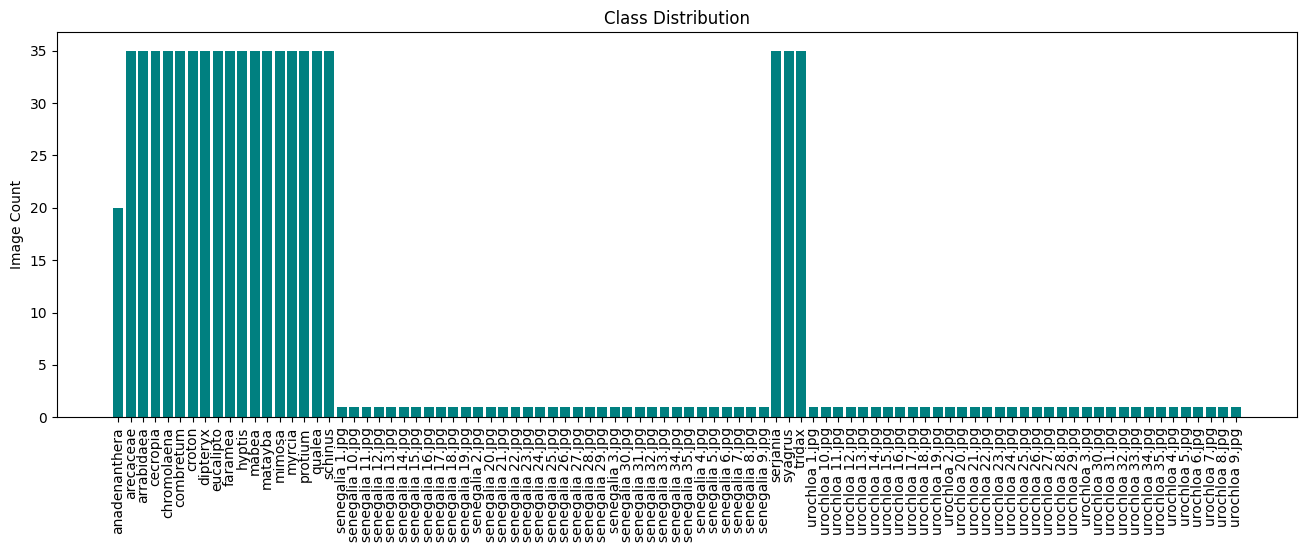

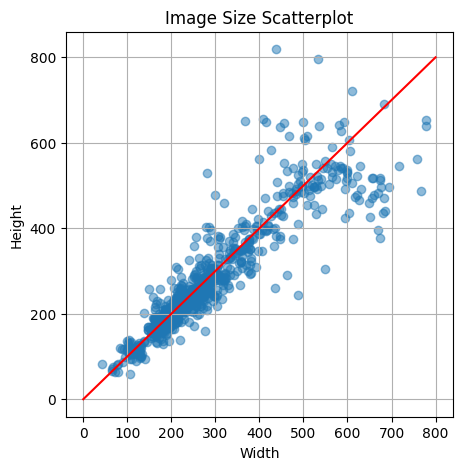

Found 646 images belonging to 91 classes.
Found 144 images belonging to 91 classes.
✅ Training images found: 646
✅ Validation images found: 144
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 91)             │        23,387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,514,651 (13.41 MB)

 Trainable params: 285,787 (1.09 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 475ms/step - accuracy: 0.1625 - loss: 4.0616 - val_accuracy: 0.6528 - val_loss: 1.4036 - learning_rate: 0.0010
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 383ms/step - accuracy: 0.5246 - loss: 1.9789 - val_accuracy: 0.7917 - val_loss: 0.8768 - learning_rate: 0.0010
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.6891 - loss: 1.3501 - val_accuracy: 0.8264 - val_loss: 0.6895 - learning_rate: 0.0010
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 426ms/step - accuracy: 0.7030 - loss: 1.2917 - val_accuracy: 0.8194 - val_loss: 0.6034 - learning_rate: 0.0010
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 358ms/step - accuracy: 0.7315 - loss: 1.0920 - val_accuracy: 0.8750 - val_loss: 0.5154 - learning_rate: 0.0010
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.8129 - loss: 0.8347 - val_accuracy: 0.8403 - val_loss: 0.4887 - learning_rate: 0.0010
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 446ms/step - accuracy: 0.7896 - loss: 0.7609

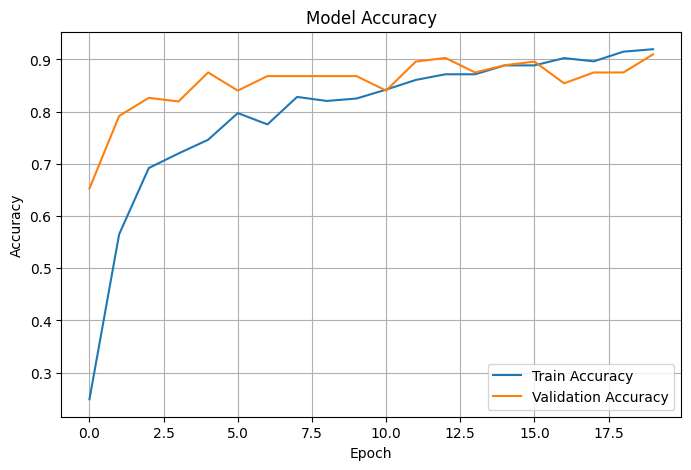

Final Training Accuracy: 0.9195046424865723
Final Validation Accuracy: 0.9097222089767456
Final Training Loss: 0.2729783058166504
Final Validation Loss: 0.3439410924911499
✅ Model saved as pollen_model.keras


Saving img1.png to img1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
✅ Predicted Class for 'img1.png': syagrus (Confidence: 58.35%)


1073

In [ ]:
from google.colab import files
import zipfile
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Upload and extract dataset
try:
    uploaded = files.upload()  # Upload archive.zip
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/dataset')
    print("✅ Successfully extracted archive.zip to /content/dataset")
except Exception as e:
    print(f"Error extracting archive.zip: {e}")

# Organize Images by Class Folder
SOURCE_DIR = "/content/dataset"
TARGET_DIR = "/content/organized_dataset"

try:
    os.makedirs(TARGET_DIR, exist_ok=True)
    for filename in os.listdir(SOURCE_DIR):
        if filename.endswith(".jpg"):
            class_name = filename.split("_")[0].lower().strip().replace("(", "").replace(")", "")
            class_dir = os.path.join(TARGET_DIR, class_name)
            os.makedirs(class_dir, exist_ok=True)
            src = os.path.join(SOURCE_DIR, filename)
            dst = os.path.join(class_dir, filename)
            shutil.move(src, dst)
    print("✅ Images organized into folders by class.")
except Exception as e:
    print(f"Error organizing images: {e}")

# Exploratory Data Analysis
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(TARGET_DIR) if os.path.isdir(os.path.join(TARGET_DIR, name))]
classes = Counter(names)
print("Class counts:", classes)

counts = [len(os.listdir(os.path.join(TARGET_DIR, folder))) for folder in sorted(os.listdir(TARGET_DIR))]
labels = sorted(os.listdir(TARGET_DIR))
plt.figure(figsize=(16, 5))
plt.bar(labels, counts, color='teal')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.ylabel('Image Count')
plt.show()
# Scatter Plot of Image Sizes
# path = SOURCE_DIR  # Use original dataset for sizes # Original line
path = TARGET_DIR  # Use organized dataset for sizes # Modified line
sizes = []
for folder in os.listdir(path): # Iterate through class folders
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path): # Ensure it's a directory
        for filename in os.listdir(folder_path): # Iterate through files in class folder
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    sizes.append(img.shape[:2])  # Append (height, width)
if sizes: # Check if sizes list is not empty before unpacking
    x, y = zip(*sizes)  # Unzip width and height
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, alpha=0.5)
    plt.title("Image Size Scatterplot")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.plot([0, 800], [0, 800], 'r-')  # Diagonal line
    plt.grid(True)
    plt.show()
else:
    print("No images found in the target directory for size analysis.")

# Image Pre-Processing
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

try:
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    train_gen = datagen.flow_from_directory(
        TARGET_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_gen = datagen.flow_from_directory(
        TARGET_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )
    print(f"✅ Training images found: {train_gen.samples}")
    print(f"✅ Validation images found: {val_gen.samples}")
except Exception as e:
    print(f"Error in data generation: {e}")

# Model Building with MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(91, activation='softmax')  # 91 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print detailed results
print("Final Training Accuracy:", max(history.history['accuracy']))
print("Final Validation Accuracy:", max(history.history['val_accuracy']))
print("Final Training Loss:", min(history.history['loss']))
print("Final Validation Loss:", min(history.history['val_loss']))

# Save the Model
model.save('/content/pollen_model.keras')
print("✅ Model saved as pollen_model.keras")

# Commented out to prevent automatic download
# from google.colab import files
# files.download('/content/pollen_model.keras')

# Application Building (Multiple Image Testing)
model = load_model('/content/pollen_model.keras')

try:
    uploaded = files.upload()  # Upload multiple images
    for fn in uploaded.keys():
        img = image.load_img(fn, target_size=(128, 128))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        prediction = model.predict(img_array)
        class_names = sorted(os.listdir(TARGET_DIR))  # Use organized dataset classes
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        print(f"✅ Predicted Class for '{fn}': {predicted_class} (Confidence: {confidence:.2f}%)")
except Exception as e:
    print(f"Error in prediction: {e}")

# Clear memory
import gc
del train_gen, val_gen, base_model
gc.collect()

Saving archive.zip to archive.zip
✅ Successfully extracted archive.zip to /content/dataset
✅ Images organized into folders by class.
Class counts: Counter({'senegalia': 35, 'urochloa': 35, 'cecropia': 1, 'anadenanthera': 1, 'protium': 1, 'combretum': 1, 'serjania': 1, 'tridax': 1, 'eucalipto': 1, 'schinus': 1, 'arrabidaea': 1, 'mabea': 1, 'qualea': 1, 'chromolaena': 1, 'dipteryx': 1, 'matayba': 1, 'croton': 1, 'hyptis': 1, 'mimosa': 1, 'myrcia': 1, 'arecaceae': 1, 'syagrus': 1, 'faramea': 1})


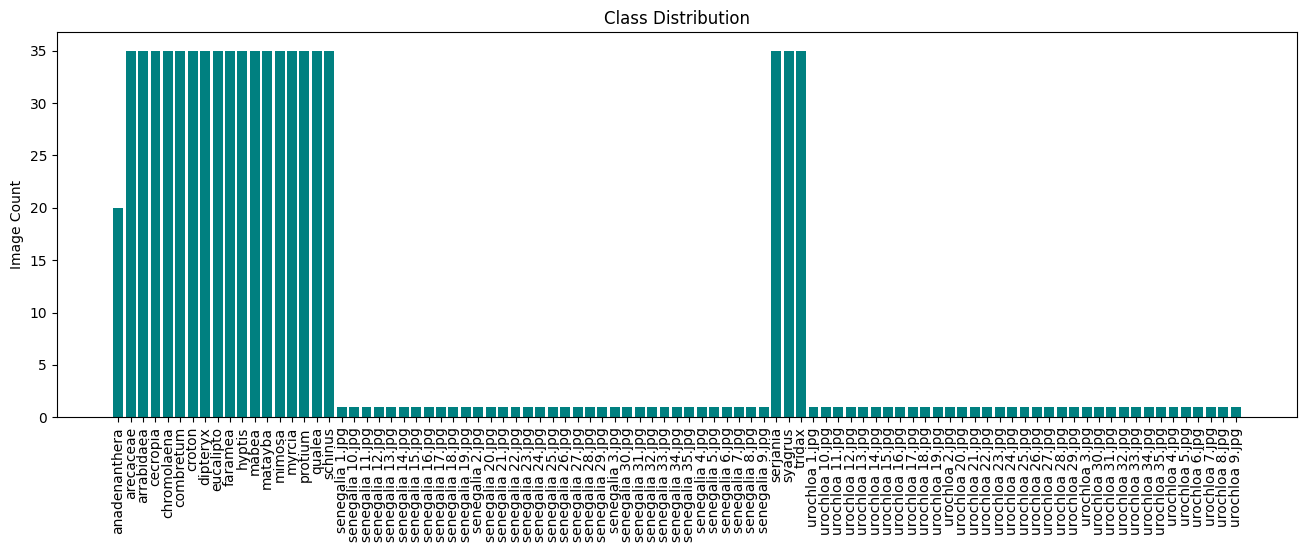

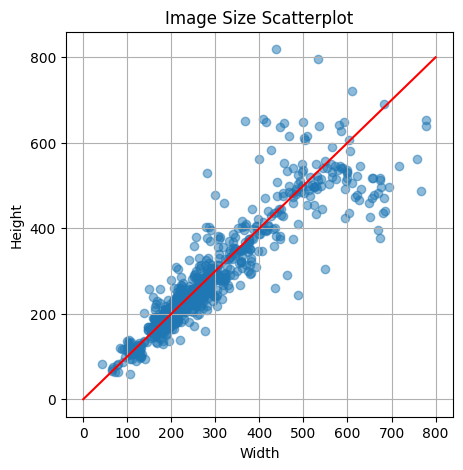

Found 646 images belonging to 91 classes.
Found 144 images belonging to 91 classes.
✅ Training images found: 646
✅ Validation images found: 144
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional) │ (None, 4, 4, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 91)             │        23,387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,514,651 (13.41 MB)

 Trainable params: 285,787 (1.09 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 665ms/step - accuracy: 0.1334 - loss: 4.0992 - val_accuracy: 0.6875 - val_loss: 1.3784 - learning_rate: 0.0010
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 593ms/step - accuracy: 0.5801 - loss: 1.9403 - val_accuracy: 0.7708 - val_loss: 0.9087 - learning_rate: 0.0010
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 617ms/step - accuracy: 0.6489 - loss: 1.5079 - val_accuracy: 0.7847 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 556ms/step - accuracy: 0.7372 - loss: 1.1295 - val_accuracy: 0.8194 - val_loss: 0.6097 - learning_rate: 0.0010
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 601ms/step - accuracy: 0.7503 - loss: 0.9812 - val_accuracy: 0.8264 - val_loss: 0.5799 - learning_rate: 0.0010
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 585ms/step - accuracy: 0.7732 - loss: 0.8629 - val_accuracy: 0.7917 - val_loss: 0.6022 - learning_rate: 0.0010
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 584ms/step - accuracy: 0.8207 - loss: 0.

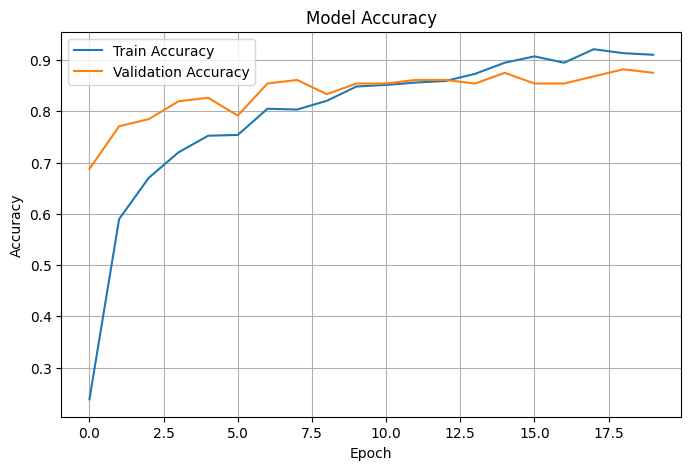

Final Training Accuracy: 0.9210526347160339
Final Validation Accuracy: 0.8819444179534912
Final Training Loss: 0.3179181218147278
Final Validation Loss: 0.3364395797252655
✅ Model saved as pollen_model.keras


In [ ]:
from google.colab import files
import zipfile
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Upload and extract dataset
try:
    uploaded = files.upload()  # Upload archive.zip
    with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/dataset')
    print("✅ Successfully extracted archive.zip to /content/dataset")
except Exception as e:
    print(f"Error extracting archive.zip: {e}")

# Organize Images by Class Folder
SOURCE_DIR = "/content/dataset"
TARGET_DIR = "/content/organized_dataset"

try:
    os.makedirs(TARGET_DIR, exist_ok=True)
    for filename in os.listdir(SOURCE_DIR):
        if filename.endswith(".jpg"):
            class_name = filename.split("_")[0].lower().strip().replace("(", "").replace(")", "")
            class_dir = os.path.join(TARGET_DIR, class_name)
            os.makedirs(class_dir, exist_ok=True)
            src = os.path.join(SOURCE_DIR, filename)
            dst = os.path.join(class_dir, filename)
            shutil.move(src, dst)
    print("✅ Images organized into folders by class.")
except Exception as e:
    print(f"Error organizing images: {e}")

# Exploratory Data Analysis
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(TARGET_DIR) if os.path.isdir(os.path.join(TARGET_DIR, name))]
classes = Counter(names)
print("Class counts:", classes)

counts = [len(os.listdir(os.path.join(TARGET_DIR, folder))) for folder in sorted(os.listdir(TARGET_DIR))]
labels = sorted(os.listdir(TARGET_DIR))
plt.figure(figsize=(16, 5))
plt.bar(labels, counts, color='teal')
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.ylabel('Image Count')
plt.show()
# Scatter Plot of Image Sizes
# path = SOURCE_DIR  # Use original dataset for sizes # Original line
path = TARGET_DIR  # Use organized dataset for sizes # Modified line
sizes = []
for folder in os.listdir(path): # Iterate through class folders
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path): # Ensure it's a directory
        for filename in os.listdir(folder_path): # Iterate through files in class folder
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    sizes.append(img.shape[:2])  # Append (height, width)
if sizes: # Check if sizes list is not empty before unpacking
    x, y = zip(*sizes)  # Unzip width and height
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, alpha=0.5)
    plt.title("Image Size Scatterplot")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.plot([0, 800], [0, 800], 'r-')  # Diagonal line
    plt.grid(True)
    plt.show()
else:
    print("No images found in the target directory for size analysis.")

# Image Pre-Processing
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

try:
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    train_gen = datagen.flow_from_directory(
        TARGET_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_gen = datagen.flow_from_directory(
        TARGET_DIR,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )
    print(f"✅ Training images found: {train_gen.samples}")
    print(f"✅ Validation images found: {val_gen.samples}")
except Exception as e:
    print(f"Error in data generation: {e}")

# Model Building with MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(91, activation='softmax')  # 91 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print detailed results
print("Final Training Accuracy:", max(history.history['accuracy']))
print("Final Validation Accuracy:", max(history.history['val_accuracy']))
print("Final Training Loss:", min(history.history['loss']))
print("Final Validation Loss:", min(history.history['val_loss']))

# Save the Model
model.save('/content/pollen_model.keras')
print("✅ Model saved as pollen_model.keras")

In [ ]:
pip install flask tensorflow pillow

In [ ]:
pip install flask tensorflow

In [ ]:
!pip install flask flask-ngrok

In [ ]:
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

app = Flask(__name__)
model = load_model('pollen_model.keras')  # Load your trained model

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))  # Update as per your model
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    img = request.files['image']
    img_path = os.path.join('static', img.filename)
    img.save(img_path)

    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    predicted_class = np.argmax(prediction)  # assuming softmax output

    return render_template('predict.html', prediction=predicted_class, image_path=img_path)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
%%html
<!DOCTYPE html>
<html>
<head>
    <title>Pollen Classifier</title>
</head>
<body>
    <h2>Upload a Pollen Grain Image</h2>
    <form action="/predict" method="POST" enctype="multipart/form-data">
        <input type="file" name="image" required>
        <button type="submit">Classify</button>
    </form>

    {% if prediction is not none %}
        <h3>Predicted Class: {{ prediction }}</h3>
        <img src="{{ image_path }}" width="200">
    {% endif %}
</body>
</html>
